In [1]:
%matplotlib inline
import matplotlib as mpl
import nuSQUIDSpy as nsq

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from cycler import cycler
from scipy.signal import find_peaks

In [2]:
units = nsq.Const()
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams.update({'font.size': 10})



## Neutrinos 

### Octant throught Earth 

In [3]:
def Prob_octant_masshairacy_cpphase(octangle,mass_h,phase):
    
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(1, 50, 400)*units.GeV


    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()

    nuSQ_sterile.Set_MixingAngle(1, 2, np.radians(octangle))
    nuSQ_sterile.Set_SquareMassDifference(2, mass_h)
    nuSQ_sterile.Set_CPPhase(0,2,np.radians(phase))

    #nuSQ_sterile.Set_SquareMassDifference(1, 1)


    #  Track

    nuSQ_sterile.Set_Body(nsq.EarthAtm())
    nuSQ_sterile.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))


    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    #%time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 0
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(1, 50, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    a=max(probs_fine)
    color_in = ['blue','Red','LightSalmon','blue']
    alpha_in = [1,0.7,0.5,0.4]
    plt.plot(e_range,probs_fine, lw = 2 , label = (" θ={}, Mh={:1.0f},CP={}".format(octangle,np.sign(mass_h),phase)))
    plt.title('Octant in EarthAtm',fontsize=18)

    plt.legend()
    plt.grid()
    plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
    plt.xlabel("energy (GeV)")
    plt.semilogx()


    return plt.plot



In [35]:
def Prob_octant_masshairacy_cpphasevv(octangle,mass_h,phase):
    
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(1, 50, 400)*units.GeV


    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()

    nuSQ_sterile.Set_MixingAngle(1, 2, np.radians(octangle))
    nuSQ_sterile.Set_SquareMassDifference(2, mass_h)
    nuSQ_sterile.Set_CPPhase(0,2,np.radians(phase))

    #nuSQ_sterile.Set_SquareMassDifference(1, 1)


    #  Track

    nuSQ_sterile.Set_Body(nsq.EarthAtm())
    nuSQ_sterile.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))


    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    #%time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 0
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(1, 50, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    a=max(probs_fine)
    color_in = ['blue','Red','LightSalmon','blue']
    alpha_in = [1,0.7,0.5,0.4]
    plt.plot(e_range,probs_fine, lw = 2 , label = (r"Maxvalue={:0.2},phase={}".format(a,phase))) #"max={:0.1a} , MixA={}, Mh={:1.0f},ph={}".format(a,octangle,np.sign(mass_h),phase))

    plt.title('$\delta_{CP} Phase$',fontsize=30)

    plt.legend()
    plt.grid()
    plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
    plt.xlabel("energy (GeV)")
    plt.semilogx()


    return plt.plot



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

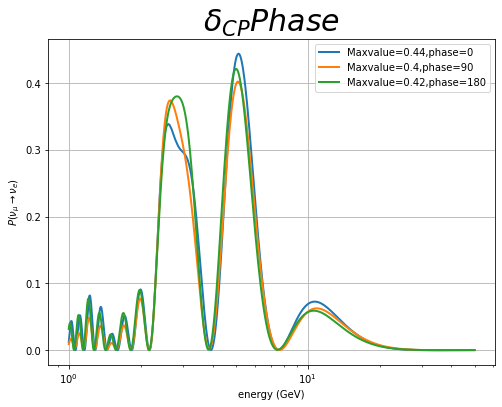

In [36]:

#Prob_octant_masshairacy_cpphase(43,2.5e-3,0)
Prob_octant_masshairacy_cpphasevv(43,2.5e-3,0)
Prob_octant_masshairacy_cpphasevv(43,2.5e-3,90)
Prob_octant_masshairacy_cpphasevv(43,2.5e-3,180)


#Prob_octant_masshairacy_cpphase(47,2.5e-3,0)

there is a differentiation between both octant 

###  cpphase  VS octant angles!

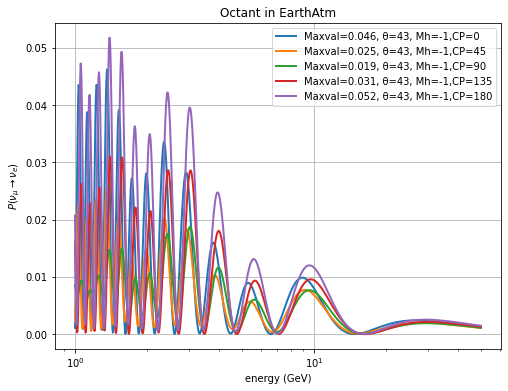

In [78]:

for i in range(0,225,45):
    
    Prob_octant_masshairacy_cpphase(43,-2.5e-3,i)
#for j in range(0,135,45):




  #  Prob_octant_masshairacy_cpphase(47,2.5e-3,j)

# prob decrease as phase increase in the detectable range.

So, the cpphase shifts the prob abit, as it decreases the prob for both octant angeles in the detectable range. 

### How Mass hairacy affects both octant angles!

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

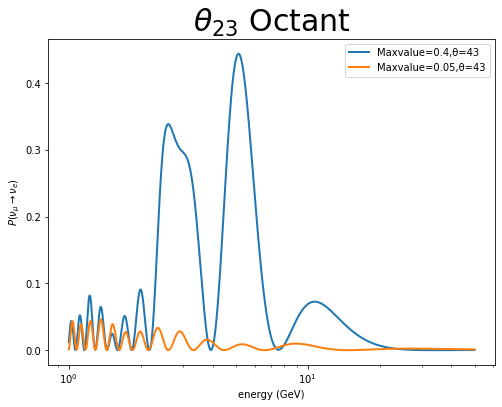

In [48]:

Prob_octant_masshairacy_cpphasevv(43,2.5e-3,0)
Prob_octant_masshairacy_cpphasevv(43,-2.5e-3,0)
    
#for j in [2.5e-3,-2.5e-3]:
 #   Prob_octant_masshairacy_cpphase(47,j,0)  

#Prob_octant_masshairacy_cpphase(47,-2.5e-3,0)  # inverted hairacy



So, IH prob is the same for both octant angle, while in NH we do have different prob for both octant angles. therefore, at low energy range in the IH we get same prob for the two octant angles. Which is interesting!!


### Mass hairacy + Cpphase

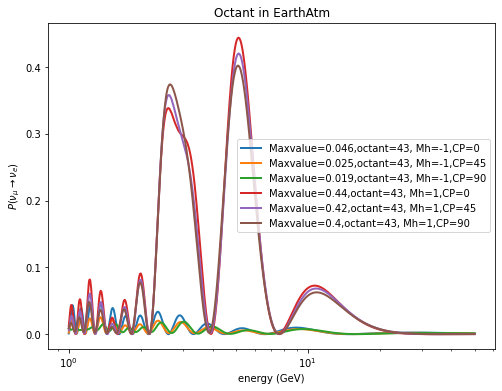

In [60]:

for i in range(0,135,45):
    Prob_octant_masshairacy_cpphase(43,-2.5e-3,i)
    
for j in range(0,135,45):
    Prob_octant_masshairacy_cpphase(43,2.5e-3,j)  



## Antineutrinos


In [38]:
def Prob_anti_octant_masshairacy_cpphase(octangle,mass_h,phase):
    
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(1, 50, 400)*units.GeV


    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.antineutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()

    nuSQ_sterile.Set_MixingAngle(1, 2, np.radians(octangle))
    nuSQ_sterile.Set_SquareMassDifference(2, mass_h)
    nuSQ_sterile.Set_CPPhase(0,2,np.radians(phase))

    #nuSQ_sterile.Set_SquareMassDifference(1, 1)


    #  Track

    nuSQ_sterile.Set_Body(nsq.EarthAtm())
    nuSQ_sterile.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))


    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    #%time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 0
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(1, 50, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['blue','Red','LightSalmon','blue']
    alpha_in = [1,0.7,0.5,0.4]
    plt.plot(e_range,probs_fine, lw = 2 , label = "anti- θ={}, Mh={:1.0f},ph={}".format(octangle,np.sign(mass_h),phase))

    plt.title('Octant in EarthAtm')

    plt.legend()
    plt.grid()
    plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
    plt.xlabel("energy (GeV)")
    plt.semilogx()


    return plt.plot



### Octant throught Earth 


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

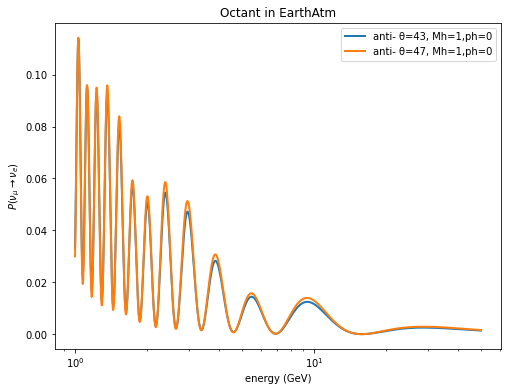

In [39]:
Prob_anti_octant_masshairacy_cpphase(43,2.5e-3,0)
Prob_anti_octant_masshairacy_cpphase(47,2.5e-3,0)

Barely resolved at 10Gev.

### cpphase VS octant angles!
 

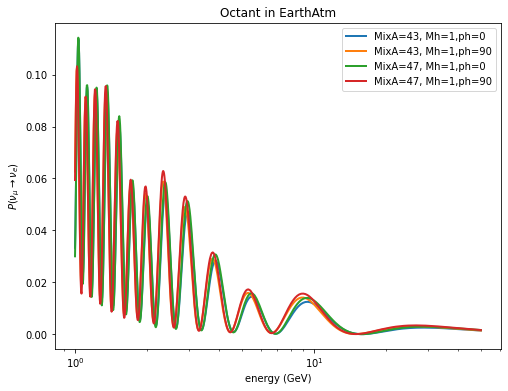

In [24]:
for i in [0,90]:
    
    Prob_anti_octant_masshairacy_cpphase(43,2.5e-3,i)
for j in [0,90]:
    
    Prob_anti_octant_masshairacy_cpphase(47,2.5e-3,j)

propabilities are very small and difficult to resolve.

### How Mass hairacy affects both octant angles!
 

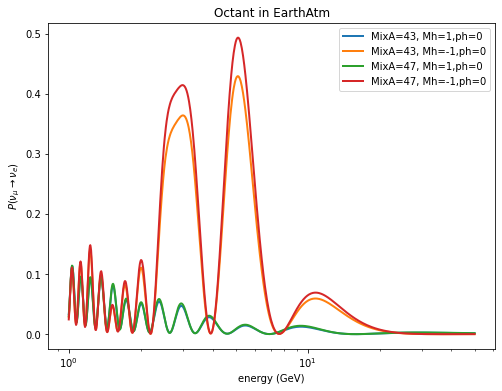

In [25]:
for i in [2.5e-3,-2.5e-3]:
    Prob_anti_octant_masshairacy_cpphase(43,i,0)
    
for j in [2.5e-3,-2.5e-3]:
    Prob_anti_octant_masshairacy_cpphase(47,j,0)

This seems interesting, the IH for the antineutrino case is similar to NH for neutrino case, and again the NH for antineutrino doesn't resolve both octant

### Mass hairacy + Cpphase
 

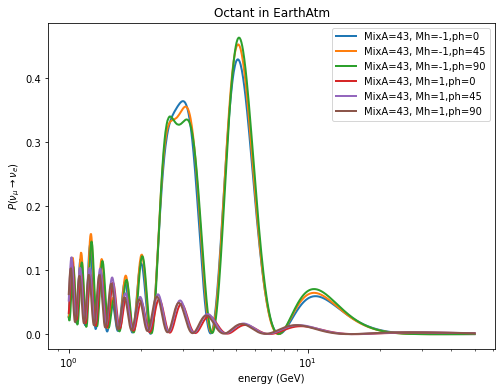

In [26]:
for i in range(0,135,45):
    Prob_anti_octant_masshairacy_cpphase(43,-2.5e-3,i)
    
for j in range(0,135,45):
    Prob_anti_octant_masshairacy_cpphase(43,2.5e-3,j)

## Neutrino vs Antineutrinos 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

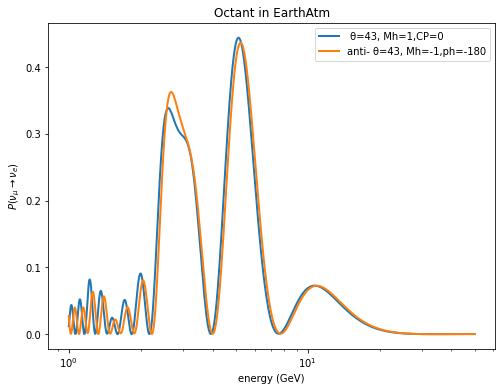

In [40]:
Prob_octant_masshairacy_cpphase(43,2.5e-3,0)

Prob_anti_octant_masshairacy_cpphase(43,-2.5e-3,-180)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

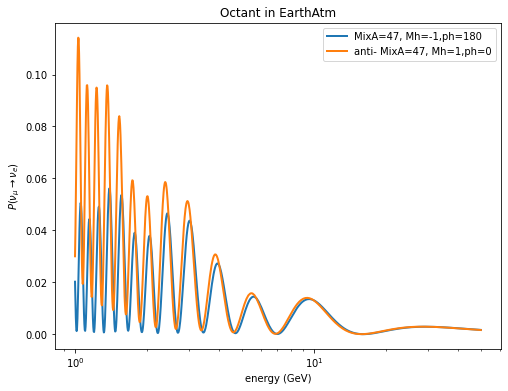

In [45]:
# HO
Prob_octant_masshairacy_cpphase(47,-2.5e-3,180)

Prob_anti_octant_masshairacy_cpphase(47,2.5e-3,0)

In the detectable range, NH for neutrinos is the almost the same as IH for antineutrinos with cpphase of -180. This effect is similar for both octant angles

In [10]:
####################################################################